To model how quantum information spreads inside a black hole using random graphs, we can represent qubit interactions via an Erdős-Rényi random graph. Each node corresponds to a qubit, and edges dictate where entangling gates (e.g., CNOT) are applied. The resulting entanglement entropy quantifies information spread, analogous to scrambling in black holes.

In [1]:
import qiskit
print(qiskit.version.get_version_info())

0.22.0


### Explanation
1. **Random Graph**: The Erdős-Rényi graph `G` defines qubit interactions. Each edge adds a CNOT, SWAP, CZ gates, simulating chaotic interactions in a black hole.
2. **Quantum Circuit**: 
   - Qubits start in a superposition (no entanglement).
   - CNOT, SWAP, CZ gates (edges) entangle qubits, spreading information.
3. **Entanglement Entropy**: 
   - After tracing out part of the system, the entropy measures how much information is shared between subsystems.
   - Higher entropy indicates greater scrambling, similar to black hole dynamics.

### Interpretation
- **Connectivity (`p`)**: Higher `p` increases entanglement entropy, mimicking faster information scrambling.
- **Graph Variability**: Run multiple trials to average over random graph realizations.
- **Extensions**: Use more qubits, deeper circuits, or different gates (e.g., CZ, SWAP) for richer behavior.

This approach links random graph theory to quantum information dynamics, offering a simplified model of black hole scrambling.

In [57]:
import numpy as np
import networkx as nx
import random
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector, partial_trace, entropy

# Parameters
n = 6                # Number of qubits
p = 0.6              # Edge probability
subsystem_size = 2   # Qubits to keep (rest are traced out)

# Generate random graph
G = nx.erdos_renyi_graph(n, p)

# Create quantum circuit
qc = QuantumCircuit(n)

# Initialize qubits in superposition (product state)
qc.h(range(n))

# Apply CNOTs, swaps, and cz gates for each edge in random order
edges = list(G.edges())
random.shuffle(edges)
for (control, target) in edges:
    qc.cx(control, target)
    #qc.h(control)
    qc.swap(control, target)
    qc.cz(control, target)

# Simulate and compute entanglement entropy
backend = Aer.get_backend('statevector_simulator')
statevector = execute(qc, backend).result().get_statevector()

# Trace out the complement of the subsystem
subsystem = list(range(subsystem_size, n))  # Qubits to trace out
rho = partial_trace(statevector, subsystem)
entropy_val = entropy(rho, base=2)

print(f"Entanglement entropy: {entropy_val:.4f}")
print("depth:",qc.depth())

Entanglement entropy: 1.0000
depth: 16


In [58]:
print(qc)

     ┌───┐                                                                  »
q_0: ┤ H ├───────■──────X─────■────────■──────X─────■───■───X──■───■───X──■─»
     ├───┤       │      │     │        │      │     │ ┌─┴─┐ │  │   │   │  │ »
q_1: ┤ H ├───────┼──────┼─────┼───■────┼───X──┼──■──┼─┤ X ├─X──■───┼───┼──┼─»
     ├───┤       │      │     │ ┌─┴─┐  │   │  │  │  │ └───┘        │   │  │ »
q_2: ┤ H ├──■────┼───X──┼──■──┼─┤ X ├──┼───X──┼──■──┼───■───X──■───┼───┼──┼─»
     ├───┤  │    │   │  │  │  │ └───┘  │      │     │ ┌─┴─┐ │  │ ┌─┴─┐ │  │ »
q_3: ┤ H ├──┼────┼───┼──┼──┼──┼────────┼──────┼─────┼─┤ X ├─X──■─┤ X ├─X──■─»
     ├───┤  │  ┌─┴─┐ │  │  │  │        │      │     │ └───┘      └───┘      »
q_4: ┤ H ├──┼──┤ X ├─┼──X──┼──■────────┼──────┼─────┼───■───X──■────────────»
     ├───┤┌─┴─┐└───┘ │     │         ┌─┴─┐    │     │ ┌─┴─┐ │  │            »
q_5: ┤ H ├┤ X ├──────X─────■─────────┤ X ├────X─────■─┤ X ├─X──■────────────»
     └───┘└───┘                      └───┘            └───┘     

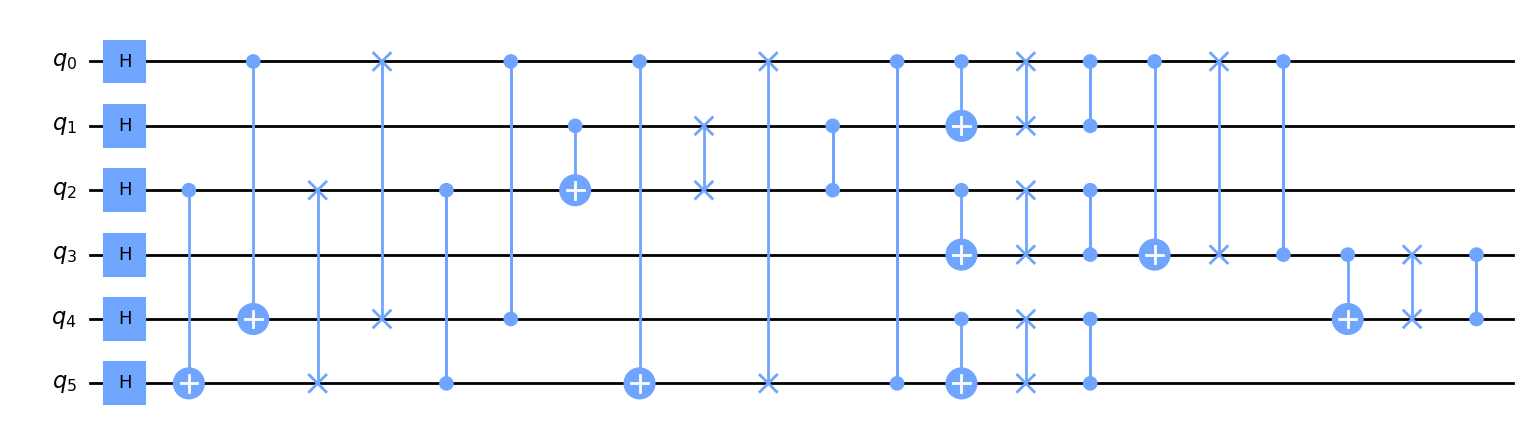

In [59]:
import matplotlib.pyplot as plt

qc.draw(output='mpl', fold=100)

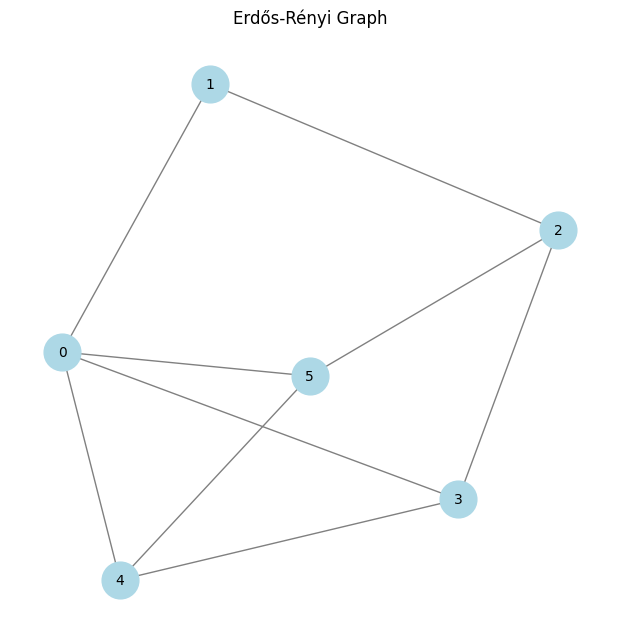

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
#n = 10  # Number of nodes
#p = 0.3  # Probability of edge creation

# Generate Erdős-Rényi graph
#G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=700, font_size=10)
plt.title("Erdős-Rényi Graph")
plt.show()

## Exploration

Let's break down entanglement entropy in simple terms.
Imagine you have two particles that are like best friends. When these particles become "entangled," it means that whatever happens to one particle instantly affects the other, no matter how far apart they are. This special connection is called "quantum entanglement."

Now, "entanglement entropy" is a way to measure how much information is shared between these two entangled particles. Think of it like this: if you have two friends who share a lot of secrets, the amount of secrets they share is like the entanglement entropy. The more secrets (or information) they share, the higher the entanglement entropy.

The maximum value of entanglement entropy depends on the number of particles or subsystems involved. In general, for a system with $$N$$ particles, the maximum entanglement entropy is given by $$\log_2(N)$$. This means that the more particles or subsystems you have, the higher the maximum entanglement entropy can be.

In simple terms, entanglement entropy tells us how strongly two particles are connected and how much information they share with each other. It's a fascinating concept that helps scientists understand the mysterious world of quantum mechanics! 

In [2]:
import numpy as np
import networkx as nx
import random
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector, partial_trace, entropy

def run_random_graphs_for_black_hole(n, p, subsystem_size):
    # Parameters
    #n: Number of qubits
    #p: Edge probability
    #subsystem_size: # Qubits to keep (rest are traced out)

    # Generate random graph
    G = nx.erdos_renyi_graph(n, p)

    # Create quantum circuit
    qc = QuantumCircuit(n)

    # Initialize qubits in superposition (product state)
    qc.h(range(n))

    # Apply CNOTs, swaps, and cz gates for each edge in random order
    edges = list(G.edges())
    random.shuffle(edges)
    for (control, target) in edges:
        qc.cx(control, target)
        qc.swap(control, target)
        qc.cz(control, target)

    # Simulate and compute entanglement entropy
    backend = Aer.get_backend('statevector_simulator')
    statevector = execute(qc, backend).result().get_statevector()

    # Trace out the complement of the subsystem
    subsystem = list(range(subsystem_size, n))  # Qubits to trace out
    rho = partial_trace(statevector, subsystem)
    entropy_val = entropy(rho, base=2)

    print(f"Entanglement entropy: {entropy_val:.4f}")

In [3]:
for i in range(20):
    run_random_graphs_for_black_hole(8, 0.99, 2)

Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 1.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 1.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 2.0000
Entanglement entropy: 1.0000
Entanglement entropy: 2.0000


In [75]:
import math

print("max entanglement entropy:",math.log2(8))

max entanglement entropy: 3.0


In [69]:
def run_random_graphs_for_black_hole_test(n, p, subsystem_size):
    # Parameters
    #n: Number of qubits
    #p: Edge probability
    #subsystem_size: # Qubits to keep (rest are traced out)

    # Generate random graph
    G = nx.erdos_renyi_graph(n, p)

    # Create quantum circuit
    qc = QuantumCircuit(n)

    # Initialize qubits in superposition (product state)
    qc.h(range(n))

    # Apply CNOTs, swaps, and cz gates for each edge in random order
    edges = list(G.edges())
    random.shuffle(edges)
    for (control, target) in edges:
        qc.cx(control, target)
        qc.swap(control, target)
        qc.cz(control, target)

    # Simulate and compute entanglement entropy
    backend = Aer.get_backend('statevector_simulator')
    statevector = execute(qc, backend).result().get_statevector()

    # Trace out the complement of the subsystem
    subsystem = list(range(subsystem_size, n))  # Qubits to trace out
    rho = partial_trace(statevector, subsystem)
    entropy_val = entropy(rho, base=2)

    print(f"Entanglement entropy: {entropy_val:.4f}")
    print("dept:",qc.depth())
    return qc

In [76]:
circ = run_random_graphs_for_black_hole_test(8, 0.99, 2)

Entanglement entropy: 2.0000
dept: 52


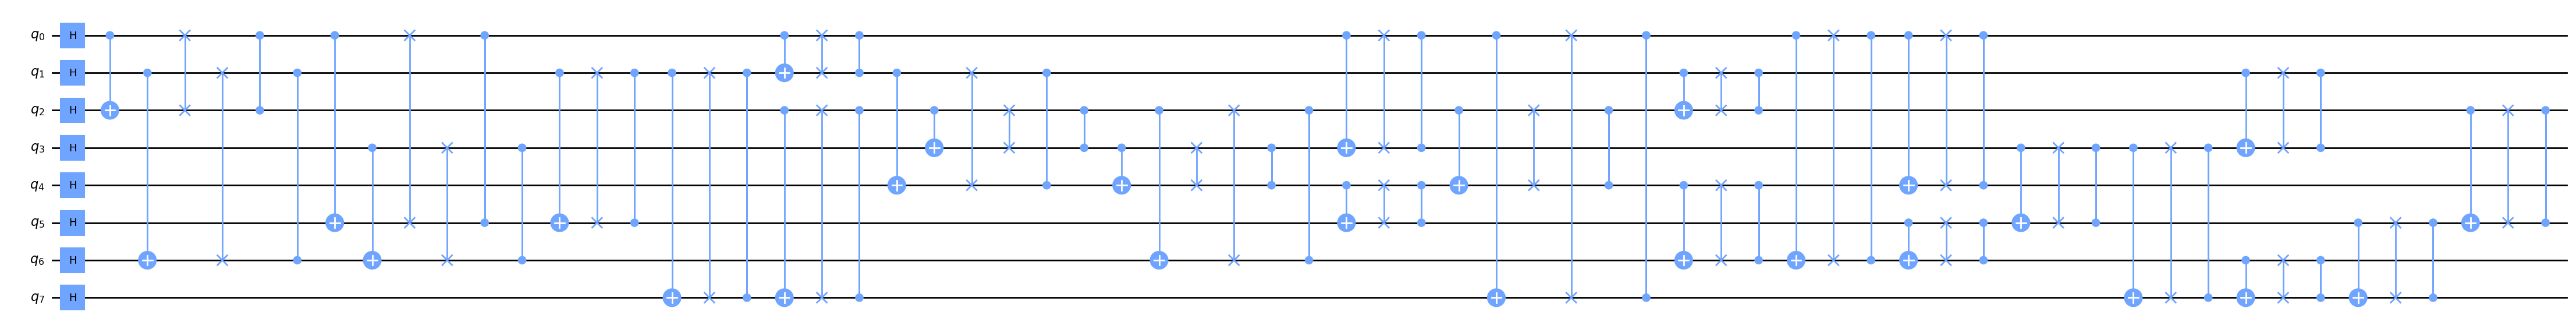

In [77]:
circ.draw(output='mpl', fold=100)

## Explore: Randomizing the order of gate application
Gate Application Order: The code applies CNOT, swap, and CZ gates in a fixed order for each edge. This might not fully explore the entanglement properties of the graph. Randomizing the order of gate application could provide more diverse results.

In [28]:
import numpy as np
import networkx as nx
import random
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector, partial_trace, entropy

def apply_gate(qc, gate, control, target):
    if gate == 'cx':
        qc.cx(control, target)
    elif gate == 'swap':
        qc.swap(control, target)
    elif gate == 'cz':
        qc.cz(control, target)

def run_random_graphs_for_black_hole_enhanced(n, p, subsystem_size):
    # Parameters
    #n: Number of qubits
    #p: Edge probability
    #subsystem_size: # Qubits to keep (rest are traced out)

    # Generate random graph
    G = nx.erdos_renyi_graph(n, p)

    # Create quantum circuit
    qc = QuantumCircuit(n)

    # Initialize qubits in superposition (product state)
    qc.h(range(n))

    # Apply CNOTs, swaps, and cz gates for each edge in random order
    edges = list(G.edges())
    random.shuffle(edges)
    gate_list = ['cx','swap','cz']
    for (control, target) in edges:
        random.shuffle(gate_list)
        for gate in gate_list:
            apply_gate(qc, gate, control, target)            

    # Simulate and compute entanglement entropy
    backend = Aer.get_backend('statevector_simulator')
    statevector = execute(qc, backend).result().get_statevector()

    # Trace out the complement of the subsystem
    subsystem = list(range(subsystem_size, n))  # Qubits to trace out
    rho = partial_trace(statevector, subsystem)
    entropy_val = entropy(rho, base=2)

    print(f"Entanglement entropy: {entropy_val:.4f} dept: {qc.depth()}")
    return qc

In [29]:
circ = run_random_graphs_for_black_hole_enhanced(8, 0.99, 2)

Entanglement entropy: 2.0000 dept: 46


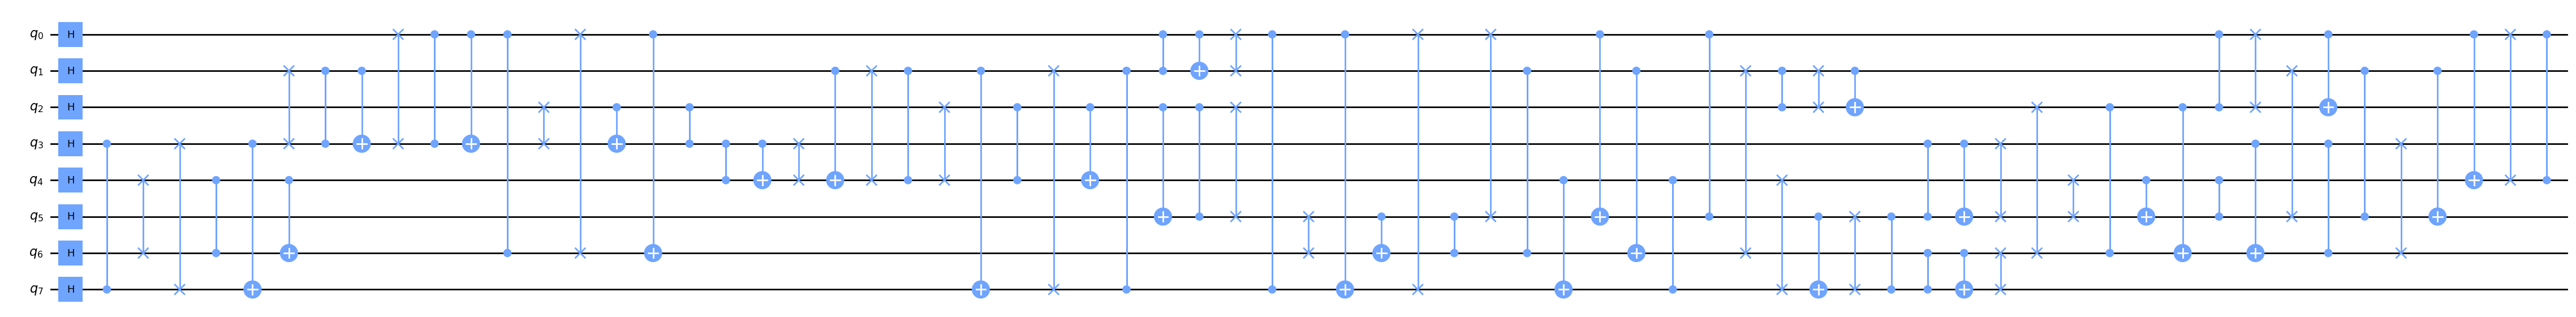

In [30]:
circ.draw(output='mpl', fold=100)

In [32]:
for i in range(50):
    circ = run_random_graphs_for_black_hole_enhanced(8, 0.99, 2)

Entanglement entropy: 2.0000 dept: 43
Entanglement entropy: 2.0000 dept: 43
Entanglement entropy: 2.0000 dept: 46
Entanglement entropy: 2.0000 dept: 58
Entanglement entropy: 2.0000 dept: 55
Entanglement entropy: 2.0000 dept: 46
Entanglement entropy: 2.0000 dept: 55
Entanglement entropy: 2.0000 dept: 46
Entanglement entropy: 2.0000 dept: 52
Entanglement entropy: 2.0000 dept: 46
Entanglement entropy: 2.0000 dept: 49
Entanglement entropy: 2.0000 dept: 40
Entanglement entropy: 2.0000 dept: 52
Entanglement entropy: 2.0000 dept: 40
Entanglement entropy: 2.0000 dept: 49
Entanglement entropy: 2.0000 dept: 37
Entanglement entropy: 2.0000 dept: 49
Entanglement entropy: 2.0000 dept: 46
Entanglement entropy: 2.0000 dept: 46
Entanglement entropy: 2.0000 dept: 49
Entanglement entropy: 2.0000 dept: 49
Entanglement entropy: 2.0000 dept: 43
Entanglement entropy: 2.0000 dept: 46
Entanglement entropy: 2.0000 dept: 40
Entanglement entropy: 1.0000 dept: 46
Entanglement entropy: 2.0000 dept: 43
Entanglement